In [14]:
import pandas as pd

iris_data = pd.read_csv('iris.data')
iris_data.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


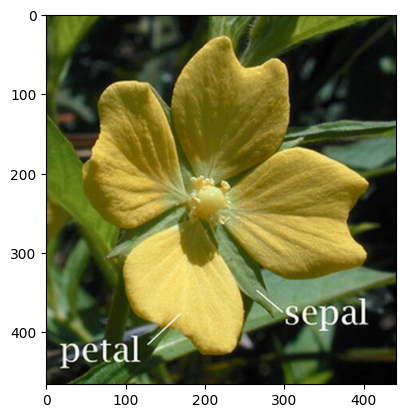

In [15]:
from PIL import Image
img=Image.open('test.jpg')
plt.imshow(img)
plt.show()

In [16]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


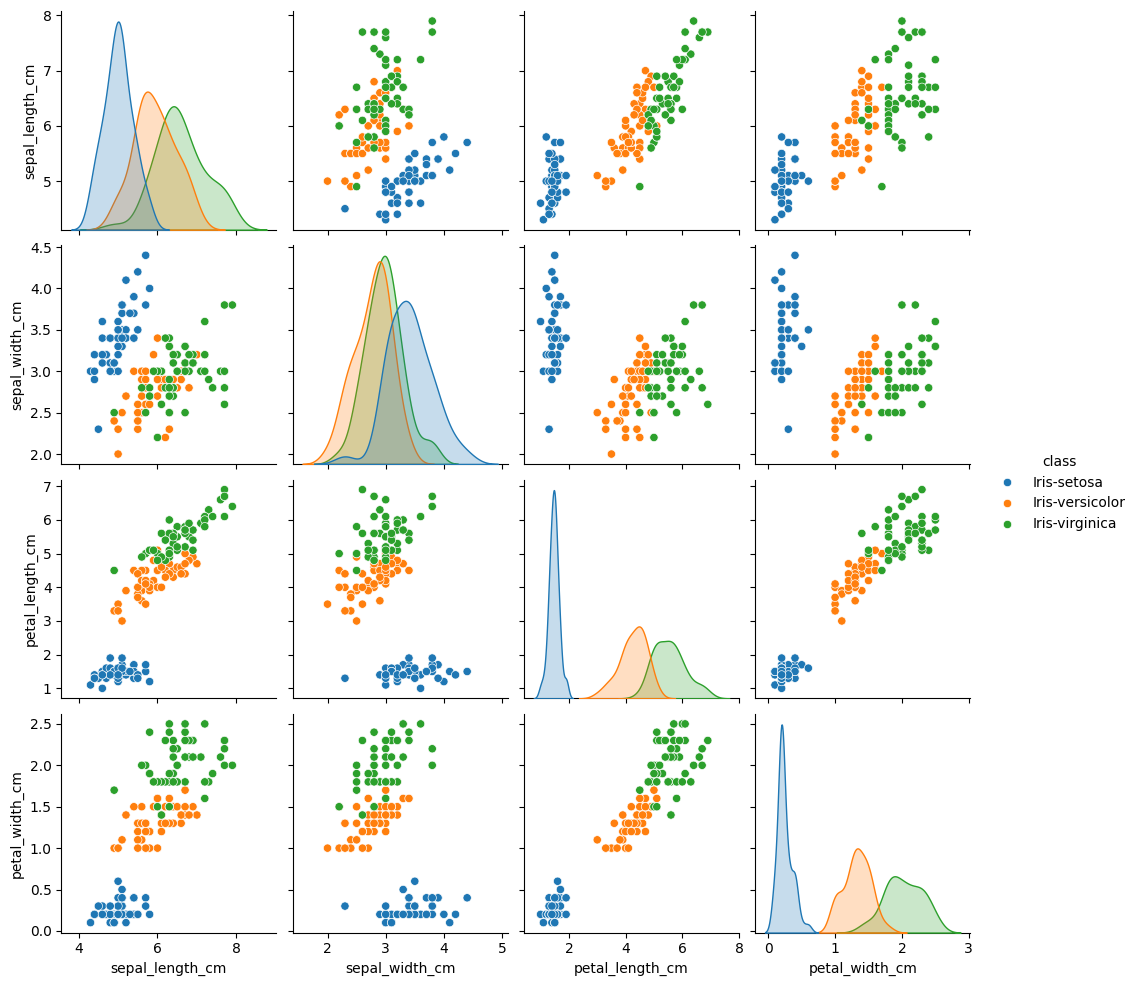

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(iris_data.dropna(), hue='class')

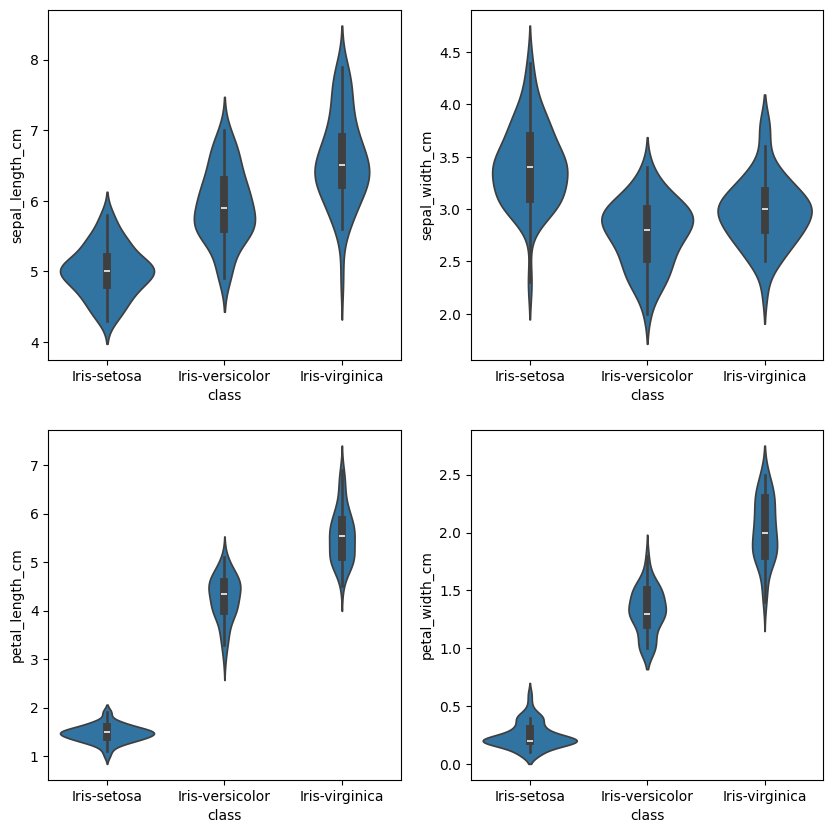

In [19]:
plt.figure(figsize=(10, 10))
for column_index, column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data)

In [21]:
from sklearn.model_selection import train_test_split

all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data['class'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [22]:
from sklearn.tree import DecisionTreeClassifier
#  1.criterion  gini  or  entropy

#  2.splitter  best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）

#  3.max_features  None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

#  4.max_depth  数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

#  5.min_samples_split  如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分
#                       如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

#  6.min_samples_leaf  这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被
#                      剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

#  7.min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起
#                          被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，
#                          或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

#  8.max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。
#                   如果加了限制，算法会建立在最大叶子节点数内最优的决策树。
#                   如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制
#                   具体的值可以通过交叉验证得到。

#  9.class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多
#                 导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重
#                 如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

#  10.min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度
#                       (基尼系数，信息增益，均方差，绝对差)小于这个阈值
#                       则该节点不再生成子节点。即为叶子节点 。

decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24924\1057698448.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(cv_scores)


Text(0.5, 1.0, 'Average score: 0.9533333333333334')

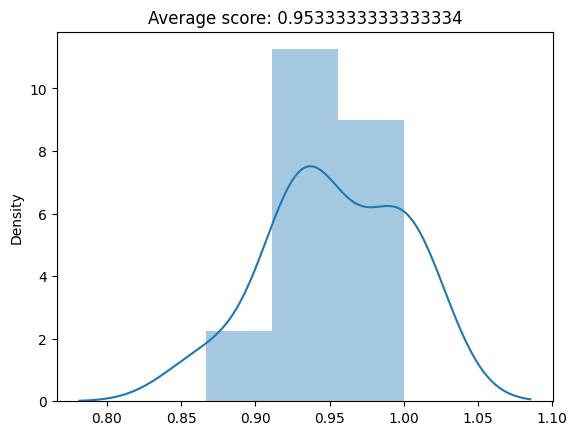

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
print (cv_scores)
#kde=False
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.64285714]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24924\3957989856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(cv_scores, kde=False)


Text(0.5, 1.0, 'Average score: 0.6642857142857144')

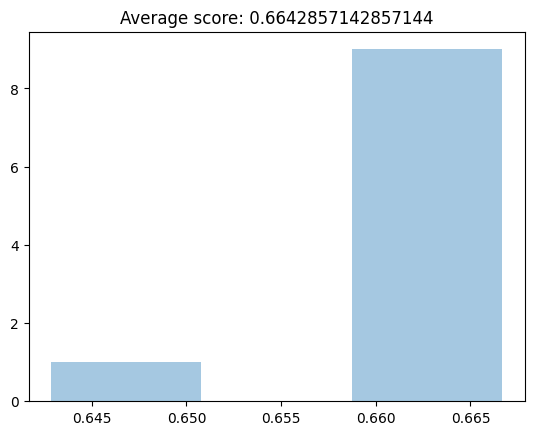

In [25]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
print (cv_scores)
sb.distplot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = KFold(n_splits=10, shuffle=False)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 5, 'max_features': 3}


Text(50.722222222222214, 0.5, 'max_depth')

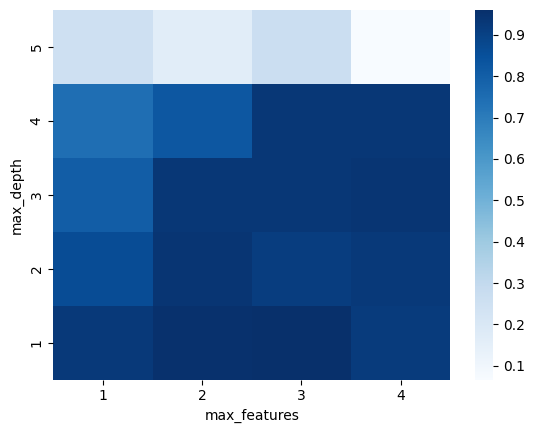

In [31]:
grid_visualization = []

grid_visualization = grid_search.cv_results_['mean_test_score']
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [32]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=5, max_features=3)

[Text(0.5, 0.9166666666666666, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.41666666666666

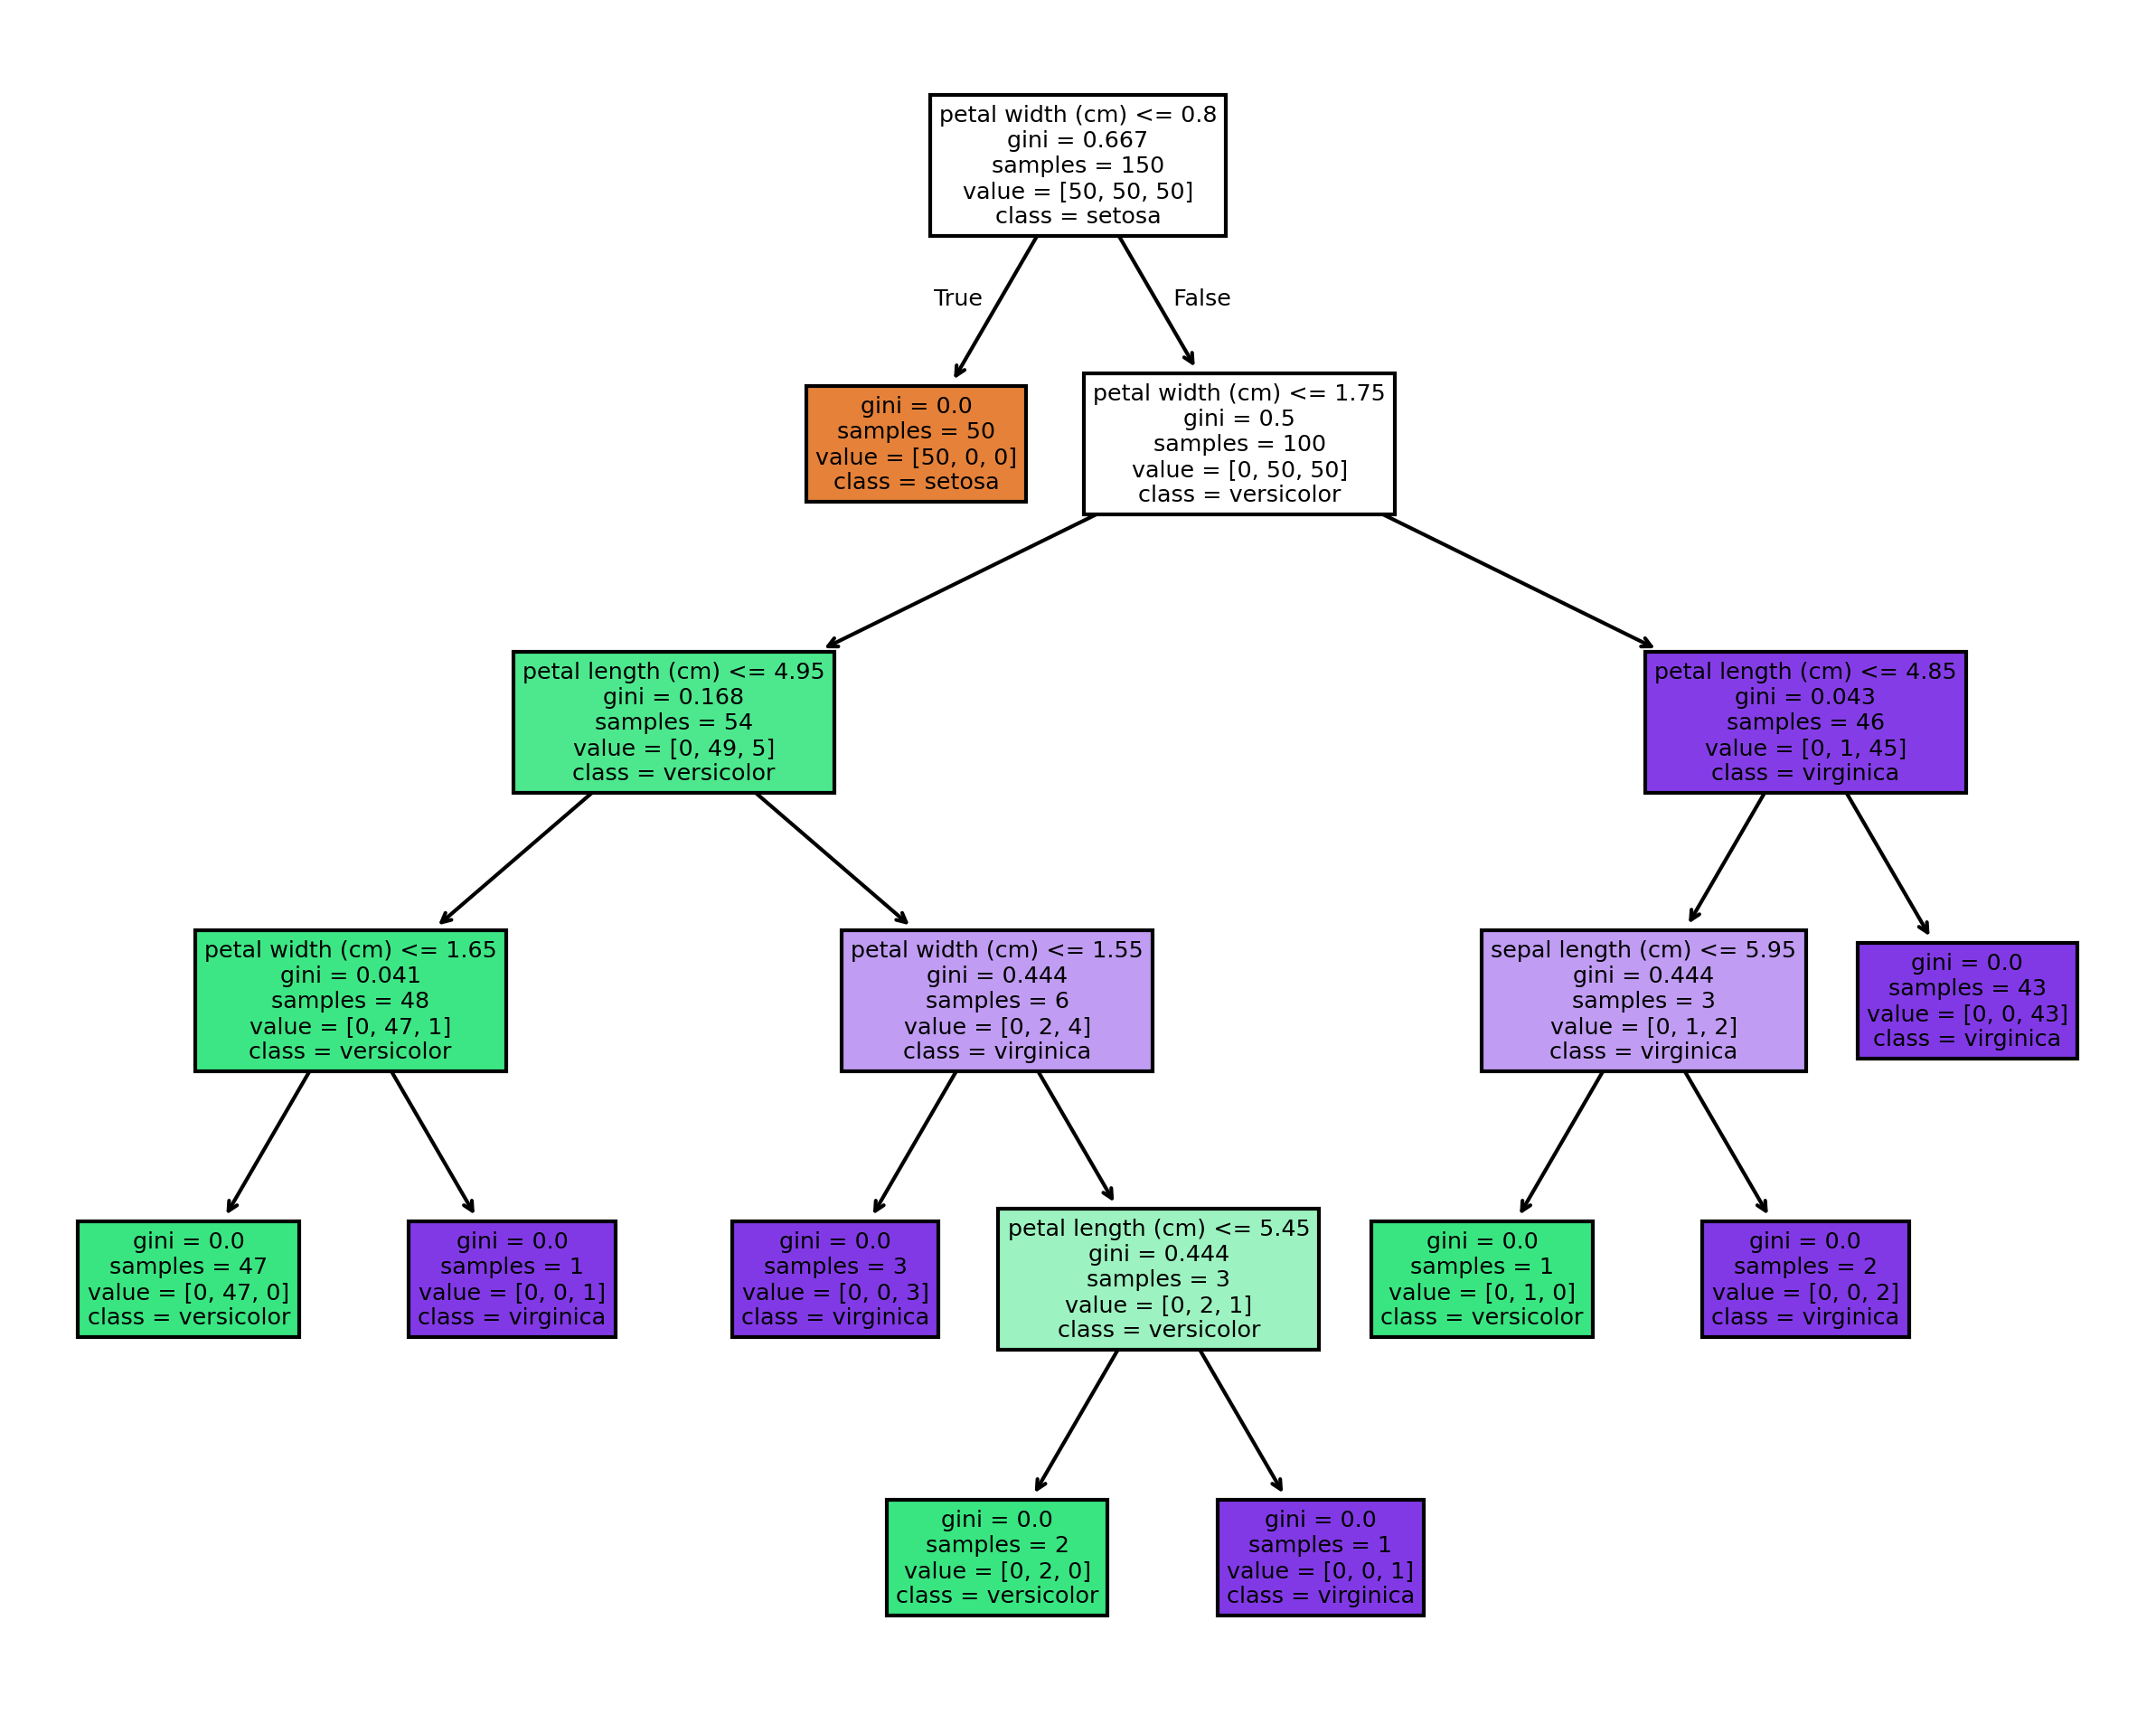

In [39]:
import sklearn.tree as tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 创建决策树分类器并训练
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X, y)

# 可视化
fig = plt.figure(figsize=(10, 8), dpi=300)
tree.plot_tree(decision_tree_classifier, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True)

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = KFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9666666666666668
Best parameters: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 5, 'warm_start': True}


RandomForestClassifier(criterion='entropy', max_features=1, n_estimators=5,
                       warm_start=True)